In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
default = pd.read_csv("default.csv")

In [3]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


#### Loading a sample subset for illustration

In [4]:
default_subset = pd.read_csv("default_subset.csv")

In [5]:
default_subset

,default,student,balance,income
0,No,Yes,817.1804,12106.14
1,Yes,Yes,1486.9980,17854.40
2,Yes,Yes,1102.4350,17391.78
3,Yes,Yes,1233.4460,12586.48
4,Yes,Yes,1276.6850,19282.44
5,Yes,Yes,1289.2460,13624.55
6,No,Yes,673.8124,17672.29
7,No,No,870.4124,17685.45
8,No,Yes,903.1768,15810.57
9,No,Yes,879.6270,14898.31


#### Visualizing the data

In [6]:
import seaborn as sns

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


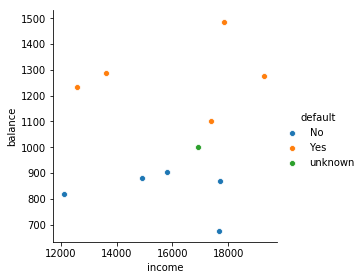

In [7]:
sns.pairplot(default_subset,hue="default",
             x_vars="income",y_vars="balance",size=4)

#### Finding the euclidean distance

In [8]:
x1 = default_subset.loc[0,["balance","income"]]

In [9]:
x2 = default_subset.loc[1,["balance","income"]]

In [10]:
np.linalg.norm(x1-x2)

5787.1537602581275

In [11]:
t1 = np.array([26,1000])
t2 = np.array([66,1000])
t3 = np.array([36,10000])

In [12]:
dist_t2_t3 = np.linalg.norm(t2-t3)
dist_t3_t1 = np.linalg.norm(t3-t1)
print("Distance between t2 and t3",dist_t2_t3,
      "\nDistance between t1 and t3",dist_t3_t1)

Distance between t2 and t3 9000.049999861112 
Distance between t1 and t3 9000.00555555384


#### Normalizing the data using MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(default_subset[["balance","income"]])
default_subset["norm_balance"] = scaled_values[:,0]
default_subset["norm_income"] = scaled_values[:,1]
default_subset

,default,student,balance,income,norm_balance,norm_income
0,No,Yes,817.1804,12106.14,0.176304,0.000000
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587
6,No,Yes,673.8124,17672.29,0.000000,0.775630
7,No,No,870.4124,17685.45,0.241765,0.777463
8,No,Yes,903.1768,15810.57,0.282057,0.516203
9,No,Yes,879.6270,14898.31,0.253097,0.389082


In [14]:
x1_n = default_subset.loc[0,["norm_balance","norm_income"]]
x2_n = default_subset.loc[1,["norm_balance","norm_income"]]
np.linalg.norm(x1_n-x2_n)

1.1489497815843785

#### Sorting data based on distance to X11

In [15]:
x11 = default_subset.loc[10,["norm_balance","norm_income"]] 
dist_to_X11 = lambda x: np.linalg.norm(x-x11)

In [16]:
default_subset["dist_toX11"] = default_subset[["norm_balance",
                                               "norm_income"]].apply(dist_to_X11,axis=1)

In [17]:
default_subset.sort_values("dist_toX11")

,default,student,balance,income,norm_balance,norm_income,dist_toX11
10,unknown,Yes,1000.0000,16900.00,0.401123,0.668013,0.000000
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.143401
8,No,Yes,903.1768,15810.57,0.282057,0.516203,0.192932
7,No,No,870.4124,17685.45,0.241765,0.777463,0.193325
9,No,Yes,879.6270,14898.31,0.253097,0.389082,0.315775
6,No,Yes,673.8124,17672.29,0.000000,0.775630,0.415309
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.475378
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,0.578657
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,0.613466
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.666114


## Full implementation of kNN on the default dataset

#### Loading the data

In [19]:
default = pd.read_csv("default.csv")

In [20]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


#### Feature Engineering
Here we shall normalize the balance and income columns in the data.

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
features_to_scale = ["balance","income"]
scaled_values = scaler.fit_transform(default[features_to_scale])
default["norm_balance"] = scaled_values[:,0]
default["norm_income"] = scaled_values[:,1]

In [23]:
default.head()

,default,student,balance,income,norm_balance,norm_income
0,No,No,729.526495,44361.62507,0.274845,0.598905
1,No,Yes,817.180407,12106.13470,0.307868,0.155727
2,No,No,1073.549164,31767.13895,0.404453,0.425862
3,No,No,529.250605,35704.49394,0.199392,0.479959
4,No,No,785.655883,38463.49588,0.295991,0.517867


#### Splitting the data into train and test set

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
default_train,default_test = train_test_split(default,test_size=0.2,random_state=100)

In [26]:
default_train.shape, default_test.shape

((8000, 6), (2000, 6))

#### Building a kNN model using sklearn

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")

In [29]:
features = ["norm_balance","norm_income"]
target = ["default"]
model.fit(default_train[features],default_train[target])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

#### Evaluating the train and test accuracies

In [30]:
train_accuracy = model.score(default_train[features],default_train[target])
test_accuracy = model.score(default_test[features],default_test[target])
print(train_accuracy,test_accuracy)

0.977375 0.967


#### Performance measured on different values of k

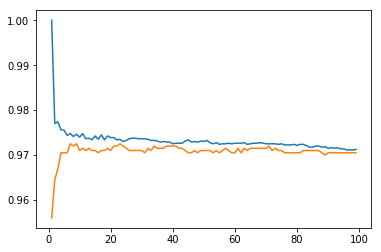

In [36]:
train_accuracies = []
test_accuracies = []
k_vals = [i for i in range(1,100)]
features = ["norm_balance","norm_income"]
target = ["default"]
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(default_train[features],default_train[target])
    train_accuracy_k = model.score(default_train[features],default_train[target])
    test_accuracy_k = model.score(default_test[features],default_test[target])
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)
plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)